<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# Copernicus Sentinel-5P TROPOMI - Carbon Monoxide - Level 2

### About

The Copernicus Sentinel-5 Precursor mission is the first Copernicus mission dedicated to atmospheric monitoring. The main objective of the Sentinel-5P mission is to perform atmospheric measurements with high spatio-temporal resolution, to be used for air quality, ozone & UV radiation, and climate monitoring and forecasting. 

Sentinel-5P carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on aerosols, ozone and other reactive gases, such as:
* `Ozone`
* `Nitrogen Dioxide (NO`<sub>`2`</sub>)
* `Sulfur Dioxide (SO`<sub>`2`</sub>)
* `Formaldehyde`
* `Aerosol`
* `Carbonmonoxide`
* `Methane`
* `Clouds`

The subsequent example introduces you to Sentinel-5P data in general and the total column of carbon monoxide sensed by Sentinel-5P TROPOMI. Carbon monoxide is a trace gas to monitor and track smoke from wildfires. This notebook features elevated carbon monoxide values due to biomass burning over Laos at the beginning of April 2023.

Read more information about Sentinel-5P [here](https://sentinel.esa.int/web/sentinel/technical-guides/sentinel-5p/products-algorithms).

### Basic Facts

> **Spatial resolution**: `Up to 5.5* km x 3.5 km` (5.5 km in the satellite flight direction and 3.5 km in the perpendicular direction at nadir) <br>
> **Spatial coverage**: `Global` <br>
> **Revisit time**:  `less than one day` <br>
> **Data availability**: `since April 2018`


### How to access the data

Sentinel-5P TROPOMI data are disseminated in the `netCDF` format and can be downloaded via the [Sentinel-5P Pre-Operations Data Hub](https://s5phub.copernicus.eu/dhus/#/home). You can login with the following credentials:
* **Username**: `s5pguest`
* **Password**: `s5pguest`

### Module outline
* [1 - Load and browse Sentinel-5P TROPOMI Carbon Monoxide Level 2 data](#load_s5p)
* [2 - Create a geographical subset](#geographical_subset_med)
* [3 - Visualise Sentinel-5P TROPOMI Carbon Monoxide Level 2 data](#vis_s5p)

<hr>

#### Load required libraries

In [2]:
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [3]:
%run ../functions.ipynb

<hr>

## <a id="load_s5p"></a>Load and browse Sentinel-5P TROPOMI Carbon Monoxide Level 2 data

A Sentinel-5P TROPOMI Carbon Monoxide Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index
* `layer`: this dimension indicates the vertical grid of profile variables

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load a netCDF file with the `open_dataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
* `group='PRODUCT'`: to load the `PRODUCT` group. 

Let us load a Sentinel-5P TROPOMI data file as `xarray.Dataset` from 6 April 2023 and inspect the data structure:

In [4]:
s5p = xr.open_dataset('../../eodata/acam_training_school/S5P/S5P_OFFL_L2__CO_____20230406T053624_20230406T071755_28387_03_020500_20230407T192541.nc', group='PRODUCT')
s5p

<xarray.Dataset>
Dimensions:                                (scanline: 4173, ground_pixel: 215, time: 1, corner: 4, layer: 50)
Coordinates:
  * scanline                               (scanline) float64 0.0 ... 4.172e+03
  * ground_pixel                           (ground_pixel) float64 0.0 ... 214.0
  * time                                   (time) datetime64[ns] 2023-04-06
  * corner                                 (corner) float64 0.0 1.0 2.0 3.0
  * layer                                  (layer) float32 4.95e+04 ... 500.0
    latitude                               (time, scanline, ground_pixel) float32 ...
    longitude                              (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                             (time, scanline) datetime64[ns] ...
    time_utc                               (time, scanline) object ...
    qa_value                               (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 ...
    carbonmonoxide_total_column_corrected  (time, scanline, ground_pixel) float32 ...

You see that the loaded data object contains of five dimensions and five data variables:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`
  * `layer`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `ga_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `carbonmonoxide_total_column`: Vertically integrated CO column density
  * `carbonmonoxide_total_column_precision`: Standard error of the vertically integrate CO column

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `carbonmonoxide_total_column` is the atmosphere mole content of carbon monoxide, has the unit `mol per m-2`, and has three dimensions, `time`, `scanline` and `groundpixel` respectively.

In [5]:
s5p_co = s5p['carbonmonoxide_total_column']
s5p_co

<xarray.DataArray 'carbonmonoxide_total_column' (time: 1, scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2023-04-06
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

You can do this for the available variables, but also for the dimensions latitude and longitude.

In [6]:
print('Latitude')
print(s5p_co.latitude)

print('Longitude')
print(s5p_co.longitude)

Latitude
<xarray.DataArray 'latitude' (time: 1, scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 2023-04-06
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
Longitude
<xarray.DataArray 'longitude' (time: 1, scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
  * time          

<br>

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [7]:
s5p_co_0604 = s5p_co[0,:,:]
s5p_co_0604

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 4173, ground_pixel: 215)>
[897195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2023-04-06
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

The attributes of the `xarray.DataArray` hold the entry `multiplication_factor_to_convert_to_molecules_percm2`, which is a conversion factor that has to be applied to convert the data from `mol per m`<sup>`2`</sup> to `molecules per cm`<sup>`2`</sup>.


In [8]:
conversion_factor = s5p_co.multiplication_factor_to_convert_to_molecules_percm2
conversion_factor

6.022141e+19

Additionally, you can save the attribute `longname`, which you can make use of when visualizing the data.

In [9]:
longname = s5p_co.long_name
longname

'Vertically integrated CO column'

## <a id='geographical_subset_med'></a>Create  a geographical subset

You can zoom into a region by specifying a `bounding box` of interest. Let us set the extent to Laos in southeast Asia.

In [12]:
lonmin=80
lonmax=130
latmin=0
latmax=35

You can use the function [generate_geographical_subset](../functions.ipynb#generate_geographical_subset) to subset an `xarray.DataArray` based on a given bounding box.

In [13]:
s5p_co_subset = generate_geographical_subset(xarray=s5p_co_0604, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
s5p_co_subset

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 845, ground_pixel: 215)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.0111244 ,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.01214856,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.01280337,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 1.857e+03 1.858e+03 ... 2.7e+03 2.701e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2023-04-06
    latitude      (scanline, ground_pixel) float32 -5.267 -5.143 ... 40.9 40.87
    longitude     (scanline, ground_pixel) float32 95.77 96.08 ... 111.9 112.3
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

<br>

## <a id="vis_s5p"></a>Visualise Sentinel-5P TROPOMI Carbon Monoxide Level 2 data

You can plot data arrays of type `numpy` with matplotlib's `pcolormesh` function. In combination with the library [cartopy](https://scitools.org.uk/cartopy/docs/latest/), you can produce high-quality maps. 

In order to make it easier to visualize the Carbon Monoxide values, we apply the conversion factor to the `xarray.DataArray`. This converts the Carbon Monoxide values from *mol per m<sup>2</sup>* to *molecules per cm<sup>2</sup>*.

In [14]:
s5p_co_converted = s5p_co_subset*conversion_factor
s5p_co_converted

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 845, ground_pixel: 215)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [6.699271e+17,          nan,          nan, ...,          nan,
                 nan,          nan],
       [7.316036e+17,          nan,          nan, ...,          nan,
                 nan,          nan],
       [7.710373e+17,          nan,          nan, ...,          nan,
                 nan,          nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 1.857e+03 1.858e+03 ... 2.7e+03 2.701e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 2023-04-06
    latitude      (scanline, ground_pixel) float32 -5.267 -5.143 ... 40.9 40.87
    longitude     (scanline, ground_pixel) float32 95.77 96.08 ... 111.9 112.3

For visualization, you can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the data. The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

Now, let us apply the [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) function and visualize the vertically integrated carbon monoxide column recorded the Sentinel-5P satellite on 05 August 2021.

Note: Multiplying the DataArray values with 1e<sup>-18</sup> improves the readibility of the map legend.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Vertically integrated CO column \n2023-04-06'}>)

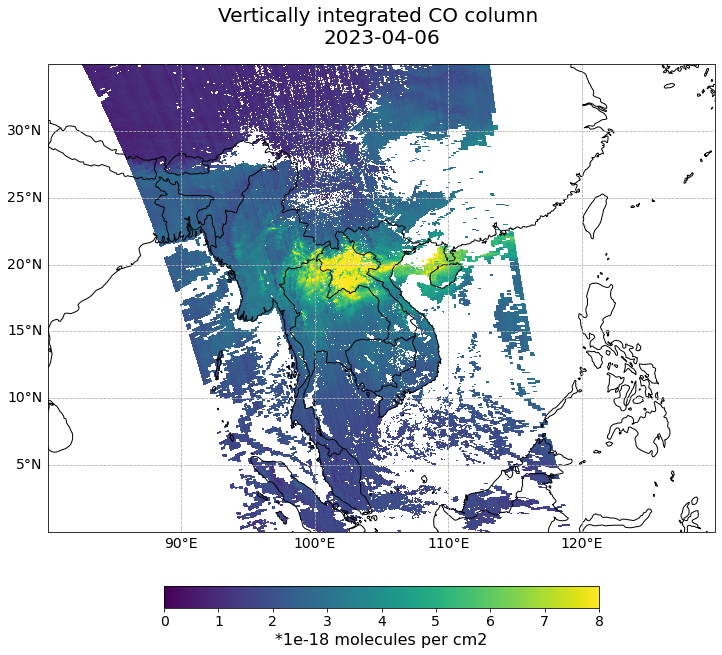

In [16]:
visualize_pcolormesh(data_array=s5p_co_converted*1e-18, 
                     longitude=s5p_co_converted.longitude, 
                     latitude=s5p_co_converted.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='viridis', 
                     unit='*1e-18 molecules per cm2', 
                     long_name=longname + ' \n' + str(s5p_co_converted.time.data)[0:10], 
                     vmin=0, 
                     vmax=8, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)


<hr>

### References
* Copernicus Sentinel-5P (processed by ESA), 2021, TROPOMI Level 2 Carbon Monoxide total column products. Version 02. European Space Agency. https://doi.org/10.5270/S5P-bj3nry0

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>